# Chapter 2: Theory
# Simple illustration of entropy on block model
<div class="alert alert-success">
    
This Notebook contains the Figurwes of Chapter 2, namely the simple illustrations of entropy and joint entropy

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

cmap='gnuplot'

path = 'C:/Users/anton.ziegon/Documents/GitHubRepos/Joint-Minimum-Entropy-Inversion-Paper/'

Consider:
$$
H(\mathbf{m}) = -\int_\Omega p_m(\mathbf{r})\; \ln p_m(\mathbf{r}) \; d\mathbf{r}.
$$

with 

$$
p_m(\mathbf{r}) = \frac{|\mathbf{m}(\mathbf{r})| }{Q} \;\; \text{with} \;\; Q=\int_\Omega |\mathbf{m}(\mathbf{r})| \: d\mathbf{r}.
$$

Text(0, 0.5, 'Params')

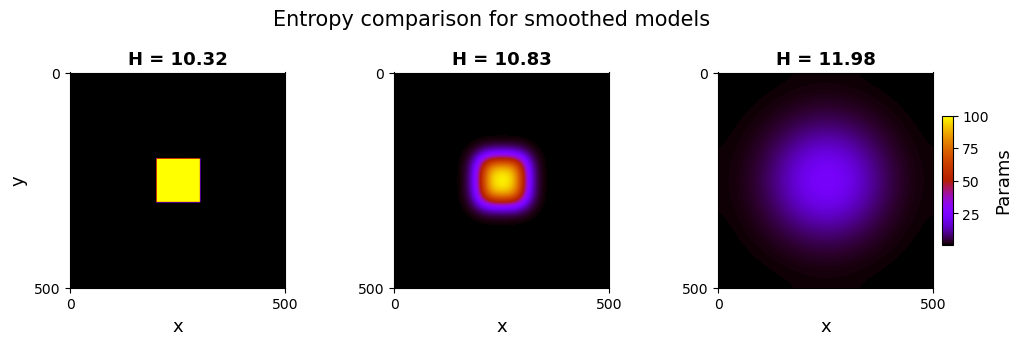

In [19]:
anomaly = 100

m0 = np.ones((500,500))
m0[200:301,200:301] = anomaly


m20 = gaussian_filter(m0,sigma=20)
m80 = gaussian_filter(m0,sigma=80)

fig, ax = plt.subplots(1,3,figsize=(10,3))
fig.tight_layout(pad=2)
for i,m in enumerate([m0,m20,m80]):
    Q = np.sum(abs(m))
    p = abs(m)/Q
    H = -np.sum(p*np.log(p))

    
    im = ax[i].imshow(m, cmap=cmap, vmin=1, vmax=anomaly)
    ax[i].set_title(f'H = {H:.2f}', fontsize=13, fontweight="bold")
    ax[i].set_xticks([0,500])
    ax[i].set_yticks([0,500])
    ax[i].set_xlabel('x', fontsize=13)
fig.suptitle('Entropy comparison for smoothed models', y=1.1, fontsize=15)
ax[0].set_ylabel('y', fontsize=13)
cax = ax[-1].inset_axes([1.04, 0.2, 0.05, 0.6])
cbar=fig.colorbar(im, ax=ax[-1], cax=cax)
cbar.ax.set_ylabel('Params', rotation=90, fontsize=13)
# plt.savefig(path+'Figures/Ch-2/Entropy_comparison.pdf',dpi=600, bbox_inches='tight')

Now consider:

$$
 p_{\mathrm{Jm}}= \frac{ \sum_{i=1}^{M} \left(\mathrm{w}_\mathrm{m}^{(i)} \left|\mathbf{m}^{(i)}\left(\mathbf{r}\right)-\mathbf{m}^{(i)}_{\mathrm{ref}}\left(\mathbf{r}\right)\right|^\mathrm{q} + \beta\right)}{Q_{\mathrm{qJME}}} =  \sum_{i=1}^{M} p_{\mathrm{Jm}}^{(i)},
$$

where...
$$
Q_{\mathrm{Jm}} = \int_{\Omega} \sum_{i=1}^{M} \left(\mathrm{w}_\mathrm{m}^{(i)} \left|\mathbf{m}^{(i)}\left(\mathbf{r}\right)-\mathbf{m}^{(i)}_{\mathrm{ref}}\left(\mathbf{r}\right)\right|^\mathrm{q} + \beta\right) \; \mathrm{d}\mathbf{r}.
$$

as well as:
$$ S_{qJME} = -\int_{\Omega} \frac{\left( \sum_{i=1}^{M}\left|\mathbf{m}^{(i)}\left(\mathbf{r}\right)-\mathbf{m}^{(i)}_{ref}\left(\mathbf{r}\right)\right|^q + \beta\right)}{Q_{qJME}} \ln\frac{\left( \sum_{i=1}^{M}\left|\mathbf{m}^{(i)}\left(\mathbf{r}\right)-\mathbf{m}^{(i)}_{ref}\left(\mathbf{r}\right)\right|^q + \beta\right)}{Q_{qJME}}\; \mathrm{d}\mathbf{r}$$

With:
$$
\text{where}\;\; Q_{qJME} = \int_{\Omega}\left ( \sum_{i=1}^{M}\left|\mathbf{m}^{(i)}\left(\mathbf{r}\right)-\mathbf{m}^{(i)}_{ref}\left(\mathbf{r}\right)\right|^q + \beta\right) \; \mathrm{d}\mathbf{r}.
$$

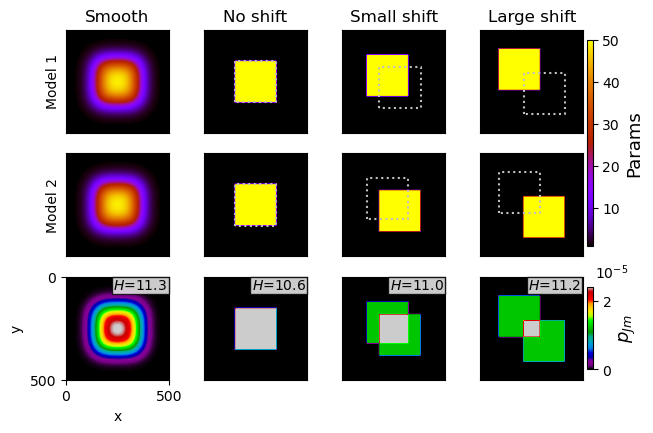

In [21]:
anomaly = 50
b = 1e-10
q = 1

tit = ['Smooth','No shift','Small shift','Large shift']

fig, ax = plt.subplots(3,4,figsize=(5,5))
# fig.tight_layout(pad=2)
for i,a in enumerate([0,0, 30, 60]):
    m0 = np.ones((500,500))
    m1 = np.ones((500,500))
    m2 = np.ones((500,500))
    
    m1[150-a:351-a,150-a:351-a] = anomaly
    m2[150+a:351+a,150+a:351+a] = anomaly

    if i==0:
        m1=gaussian_filter(m1,sigma=40)
        m2=gaussian_filter(m2,sigma=40)
    
    Q = np.sum([(abs(m-m0)**q + b) for m in [m1,m2]])

    pdf = (b+abs(m1-m0)**q+(b+abs(m2-m0)**q))/Q
    H = -np.sum(pdf*np.log(pdf))
    ax[0,i].set_title(tit[i])

    fac = 1e5
    im2 = ax[2,i].imshow(pdf*fac, cmap='nipy_spectral', vmin=0, vmax=2.4)
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])

    # ax[2,i].text(110, 0, r'$H$'+f'={H:.1f}', fontsize=10,
    #                           bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 1})
    ax[2,i].text(230, 60, r'$H$'+f'={H:.1f}', fontsize=10,
                              bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 1})
    
    for j,m in enumerate([m1,m2]):
        im1 = ax[j,i].imshow(m, cmap=cmap, vmin=1, vmax=anomaly)
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
        if i==0:
            ax[j,i].set_ylabel(f'Model {j+1}')
        else:
            if j==1:
                pointsx=[150-a,150-a,351-a,351-a,150-a]
                pointsy=[351-a,150-a,150-a,351-a,351-a]
                ax[j,i].plot(pointsx,pointsy,'silver', linestyle=':')
            else:
                pointsx=[150+a,150+a,351+a,351+a,150+a]
                pointsy=[351+a,150+a,150+a,351+a,351+a]
                ax[j,i].plot(pointsx,pointsy,'silver', linestyle=':')
            

ax[2,0].set_xticks([0,500])
ax[2,0].set_yticks([0,500]) 
ax[2,0].set_ylabel('y')
ax[2,0].set_xlabel('x')

# colorbars
cax = ax[1,-1].inset_axes([1.04, 0.1, 0.05, 2])
cbar=fig.colorbar(im1, ax=ax[1,2], cax=cax)
cbar.ax.set_ylabel('Params', rotation=90, fontsize=13) 

cax = ax[2,-1].inset_axes([1.04, 0.1, 0.05, 0.8])
cbar=fig.colorbar(im2, ax=ax[2,2], cax=cax)
cbar.ax.set_ylabel(r'$p_{Jm}$', rotation=90, fontsize=13) 
cbar.ax.set_title(r'          $10^{-5}$', rotation=0, fontsize=10) 
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)


# fig.suptitle('Joint entropy stabilizer comparison for shifted models',
#             x=.21, y=1, horizontalalignment='left', verticalalignment='top', fontsize = 15)
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=1.2,
                    top=0.9,
                    wspace=0.02,
                    hspace=0.2)



# plt.savefig(path+'Figures/Ch-2/Joint_Entropy_comparison.pdf', dpi=600, bbox_inches='tight')